In [6]:
# this cut will try Pyflux ARIMAX

1 - Data Wrangling, Visualise the TS
2 - Stationarise the TS
3 - Plot ACF/PACF and find optimal parameters
4 - Build Arima model
5 - Make Forecast

# 1. Visualise the TS

First step is to visualize the data to understand what type of model to use later on.
Is there an overall trend in your data that I should be aware of? 
Does the data show any seasonal trends? If there isn’t a seasonal trend in the data, I can just use a regular ARIMA model instead. 

In [3]:
# set up the environment for the data exploration
import numpy as np
import pandas as pd
import pyflux as pf
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
# for a start, there is a need to change 'Date' from data type 'object' to TS object
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%b-%y')

            AUDTHB  AUDJPY  AUDUSD
Date                              
2006-01-02  30.080   86.47  0.7331
2006-01-03  30.160   85.96  0.7398
2006-01-04  30.195   86.72  0.7478
2006-01-05  30.050   86.63  0.7475
2006-01-06  29.990   86.28  0.7541


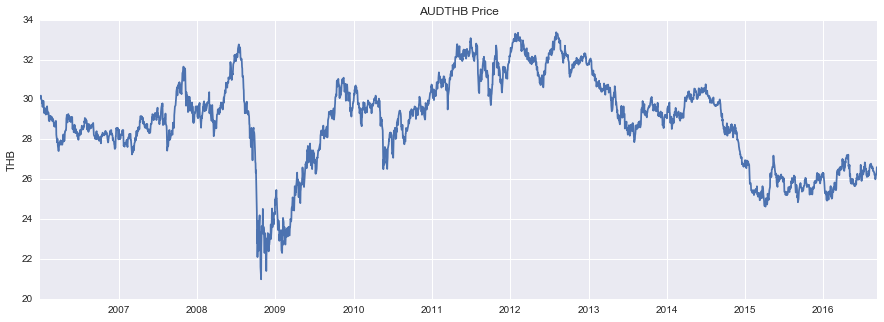

In [8]:
# followed by a ts parse of the same original CVS data
data2 = pd.read_csv('aud_fx_thb_jpy_usd.csv', na_values=[' '], parse_dates=[0], index_col=[0], date_parser=dateparse)
# drop the null values
data2= pd.DataFrame(data2).dropna()
print (data2.head())


#data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/MASS/drivers.csv")
#data.index = data['time'];
#data.loc[(data['time']>=1983.05), 'seat_belt'] = 1;
#data.loc[(data['time']<1983.05), 'seat_belt'] = 0;
#data.loc[(data['time']>=1974.00), 'oil_crisis'] = 1;
#data.loc[(data['time']<1974.00), 'oil_crisis'] = 0;

plt.figure(figsize=(15,5));
plt.plot(data2.index,data2.AUDTHB);
plt.ylabel('THB');
plt.title('AUDTHB Price');
plt.plot();

In [17]:
data2.loc[(data2.index>='2015-03-01'), 'event1'] = 1;
data2.loc[(data2.index<'2015-03-01'), 'event1'] = 0;
data2.loc[(data2.index>='2008-10-01'), 'GFC'] = 1;
data2.loc[(data2.index<'2008-06-01'), 'GFC'] = 0;

model = pf.ARIMAX(data=data2,formula='AUDTHB~1+event1+GFC',ar=1,ma=1)
x = model.fit()
x.summary()

ARIMAX(1,0,1)                                                                                             
======================================================= ==================================================
Dependent Variable: AUDTHB                              Method: MLE                                       
Start Date: 2006-01-03 00:00:00                         Log Likelihood: -41.3245                          
End Date: 2016-09-09 00:00:00                           AIC: 94.649                                       
Number of observations: 2702                            BIC: 130.0595                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
AR(1)                                    0.9942     0.0022     446.2095 0.0      (0.9899 | 0.9986)        
MA(1)                                

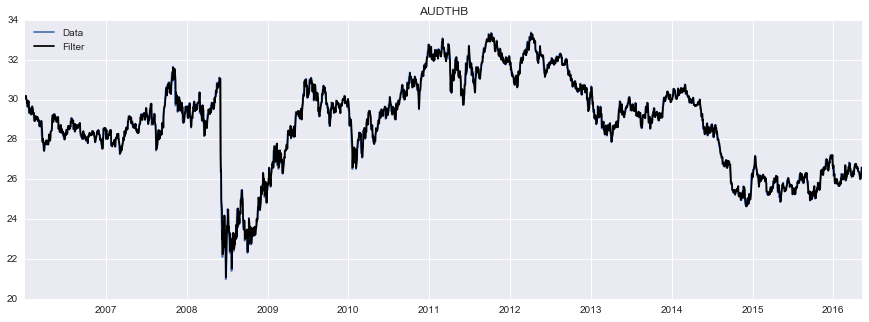

In [26]:
model.plot_fit(figsize=(15,5))

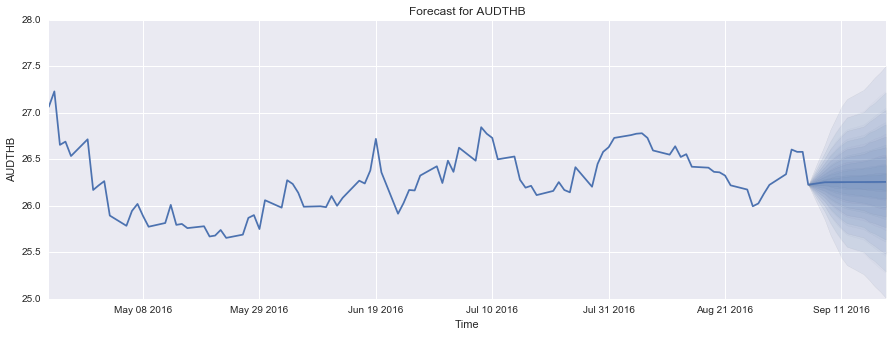

In [29]:
model.plot_predict(h=10,oos_data=data2.iloc[-12:],past_values=100,figsize=(15,5))